In [1]:
import seaborn as sns

In [2]:
# import datasets
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')

## Categorical Plots

### Categorical Scatter Plot

- Stripplot
- Swarmplot

### Categorical Distribution Plots

- Boxplot
- Violinplot

### Categorical Estimate Plot -> for central tendency

- Barplot
- Pointplot
- Countplot

### Figure level function -> `catplot`

<Axes: xlabel='total_bill', ylabel='tip'>

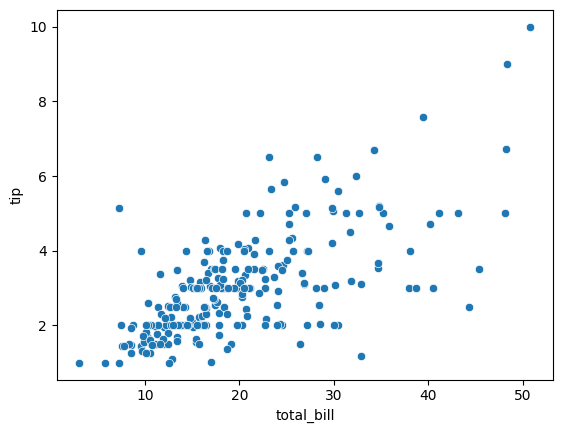

In [3]:
sns.scatterplot(data=tips, x='total_bill',y='tip')

<Axes: xlabel='day', ylabel='total_bill'>

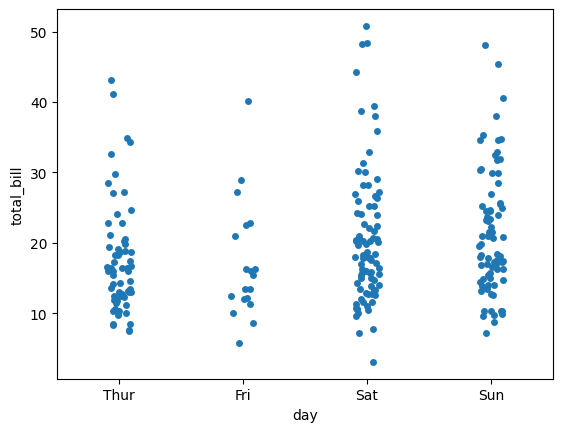

In [8]:
# strip plot
# axes level function (categorical vs numerical)
sns.stripplot(data=tips,x='day',y='total_bill')
# The points in this graph should be in straight line, but it is not, because seaborn add some noise to make it look like kind of scatter plot, but it can be disabled by the argument jitter = False or we can also specify the noise using jitter as well

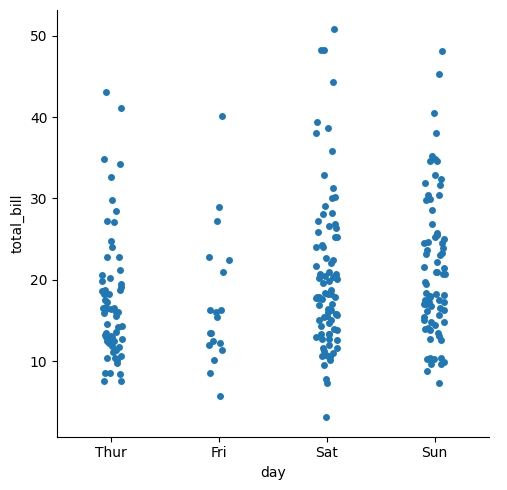

In [16]:
# using catplot
# figure level function
sns.catplot(data=tips, x='day',y='total_bill',kind='strip',jitter=0.1)

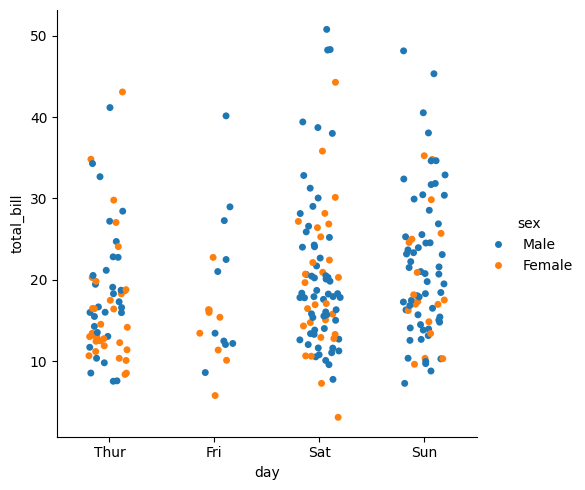

In [6]:
# jitter
sns.catplot(data=tips, x='day',y='total_bill',kind='strip',jitter=0.2,hue='sex')

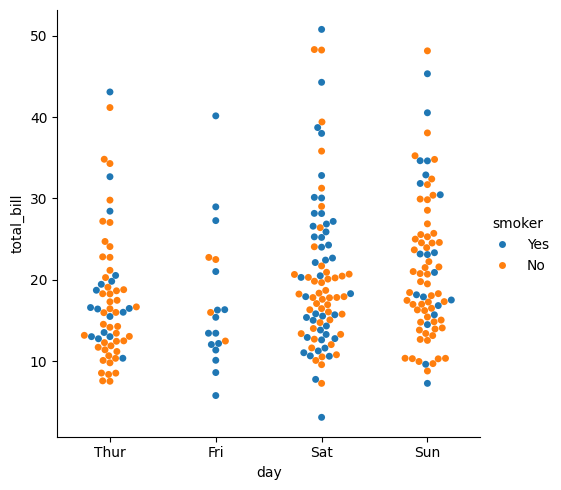

In [19]:
# swarmplot
sns.catplot(data=tips, x='day',y='total_bill',kind='swarm',hue='smoker')

<Axes: xlabel='day', ylabel='total_bill'>

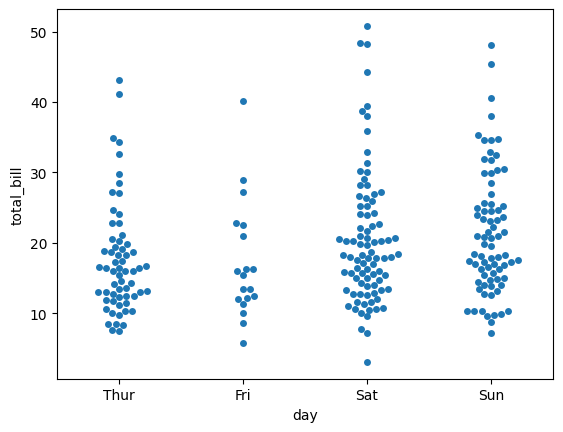

In [20]:
sns.swarmplot(data=tips, x='day',y='total_bill')

<Axes: xlabel='day', ylabel='total_bill'>

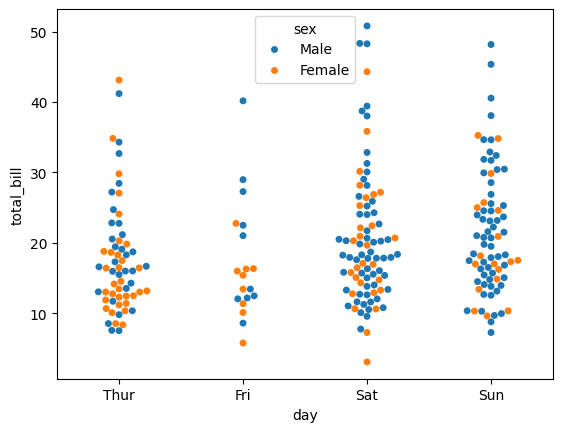

In [21]:
# hue
sns.swarmplot(data=tips, x='day',y='total_bill',hue='sex')

### Boxplot

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”). It can tell you about your outliers and what their values are. Boxplots can also tell you if your data is symmetrical, how tightly your data is grouped and if and how your data is skewed.

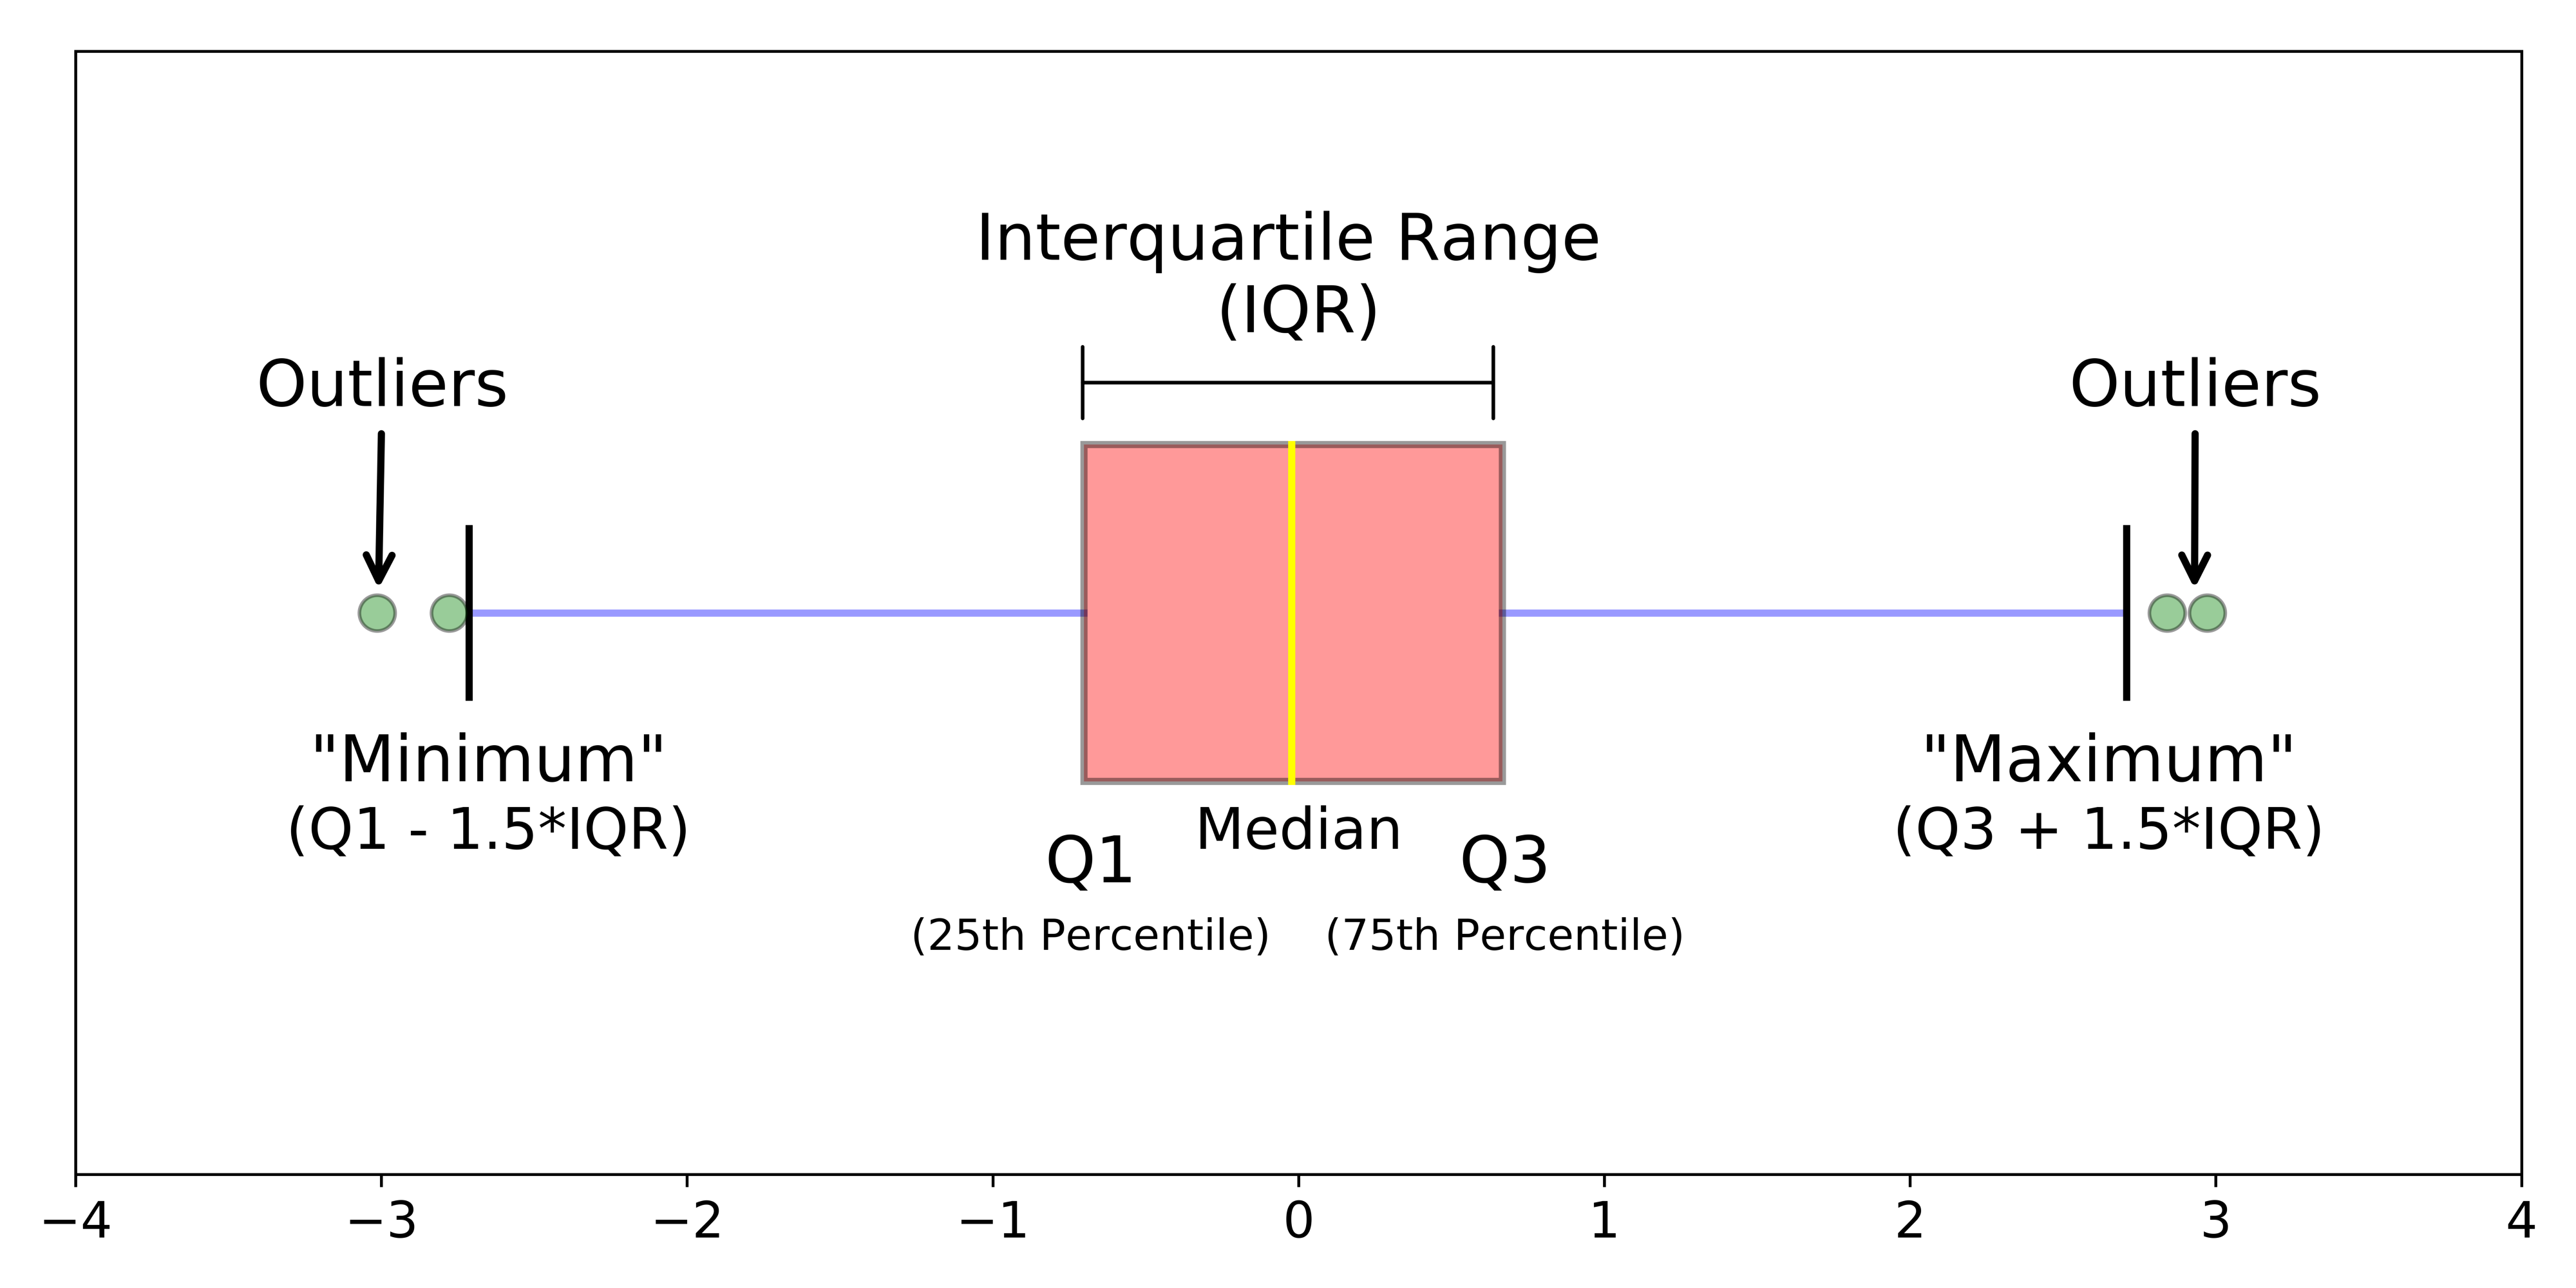

<Axes: xlabel='day', ylabel='total_bill'>

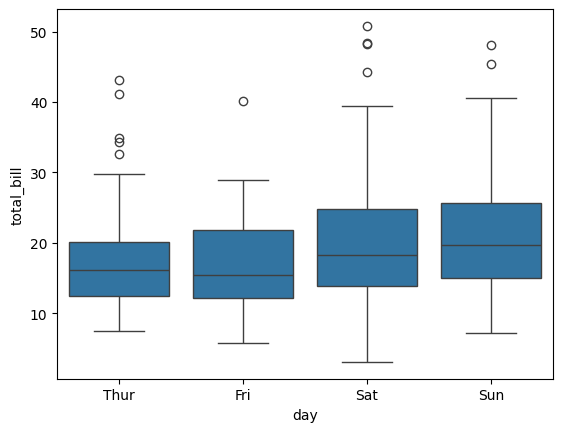

In [24]:
# Box plot
sns.boxplot(data=tips,x='day',y='total_bill')

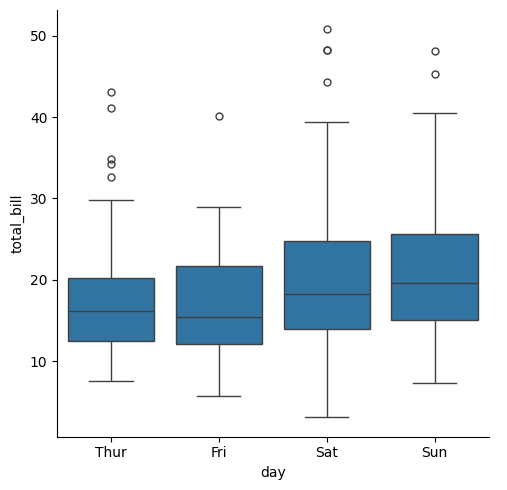

In [28]:
# Using catplot
sns.catplot(data=tips,x='day',y='total_bill',kind='box')

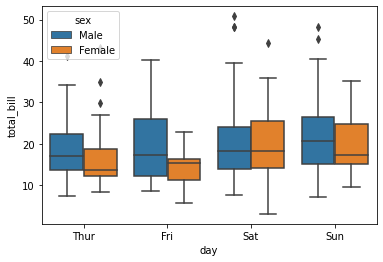

In [ ]:
# hue
sns.boxplot(data=tips,x='day',y='total_bill',hue='sex')

<Axes: ylabel='total_bill'>

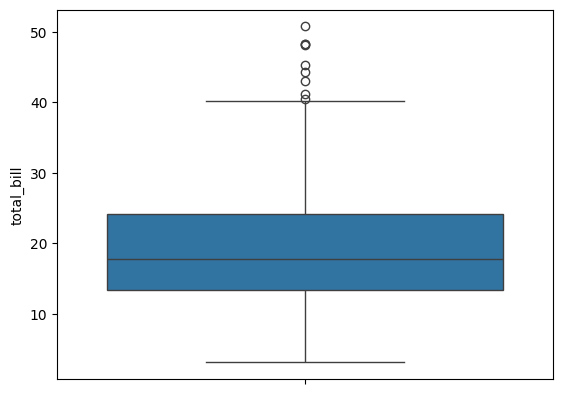

In [29]:
# single boxplot -> numerical col
sns.boxplot(data=tips,y='total_bill')

### Violinplot = (Boxplot + KDEplot)

<Axes: xlabel='day', ylabel='total_bill'>

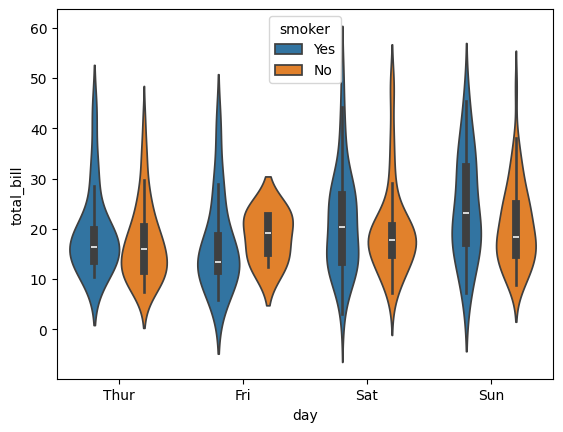

In [31]:
# violinplot
sns.violinplot(data=tips,x='day',y='total_bill',hue='smoker')

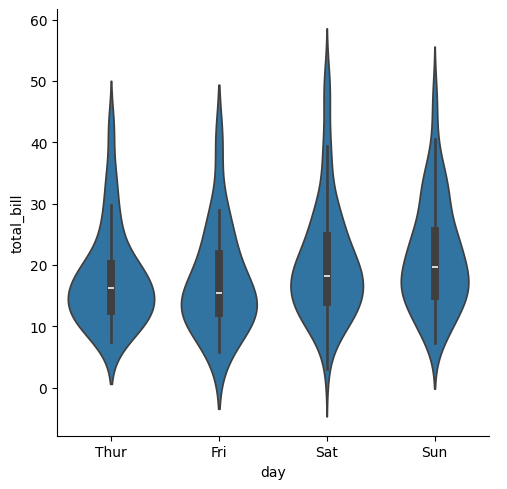

In [32]:
sns.catplot(data=tips,x='day',y='total_bill',kind='violin')

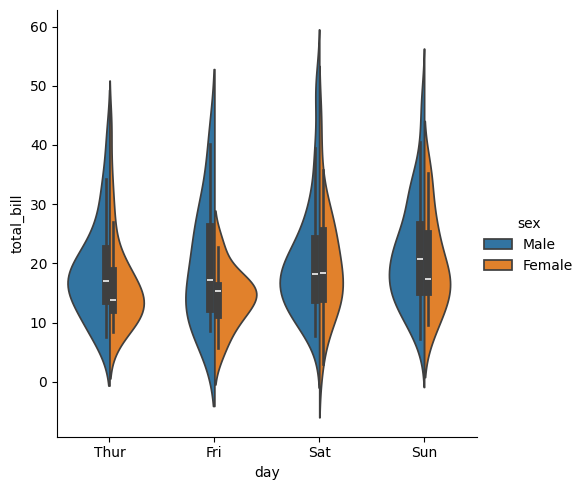

In [33]:
# hue

sns.catplot(data=tips,x='day',y='total_bill',kind='violin',hue='sex',split=True)

<Axes: xlabel='sex', ylabel='total_bill'>

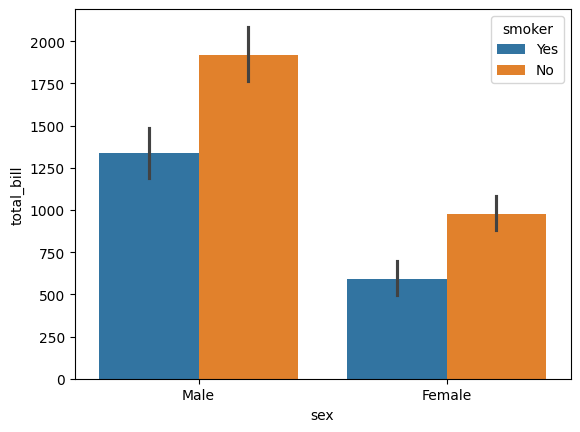

In [38]:
# barplot
# some issue with errorbar
import numpy as np
sns.barplot(data=tips, x='sex', y='total_bill',hue='smoker',estimator=np.sum)

When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using error bars

<Axes: xlabel='sex', ylabel='total_bill'>

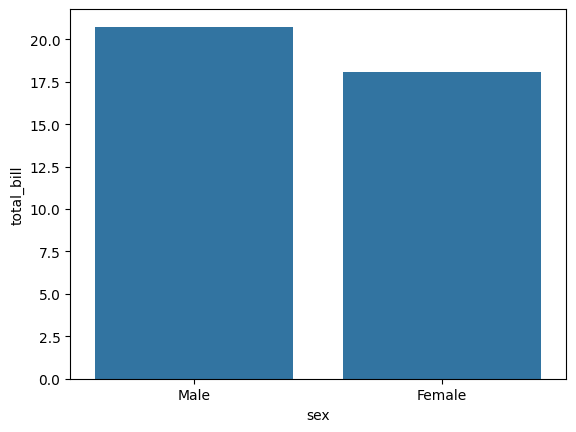

In [40]:
sns.barplot(data=tips, x='sex', y='total_bill',errorbar=None)

<Axes: xlabel='sex', ylabel='total_bill'>

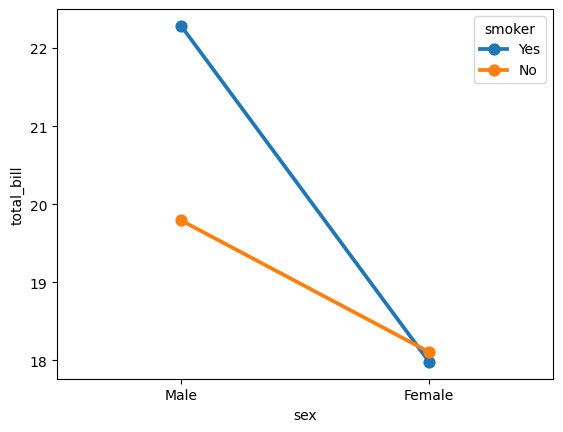

In [43]:
# point plot
sns.pointplot(data=tips, x='sex', y='total_bill',hue='smoker',errorbar=None)

<Axes: xlabel='sex', ylabel='count'>

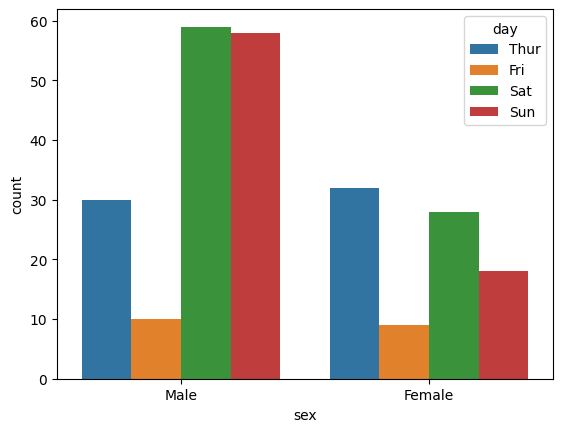

In [50]:
# countplot -> we can say it is graph of value_counts
sns.countplot(data=tips,x='sex',hue='day')

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable

In [ ]:
# pointplot

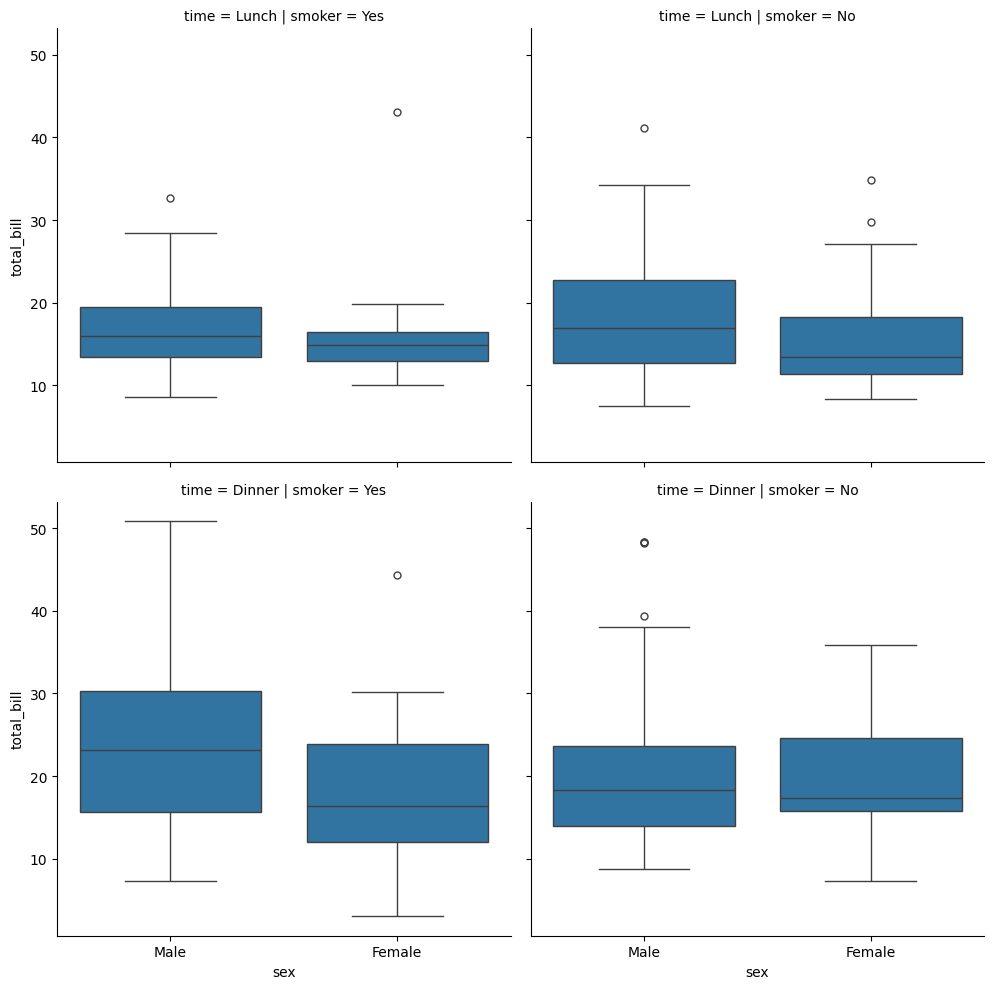

In [45]:
# faceting using catplot
sns.catplot(data=tips, x='sex',y='total_bill',col='smoker',kind='box',row='time')

### Regression Plots

- regplot
- lmplot

In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression.

<Axes: xlabel='total_bill', ylabel='tip'>

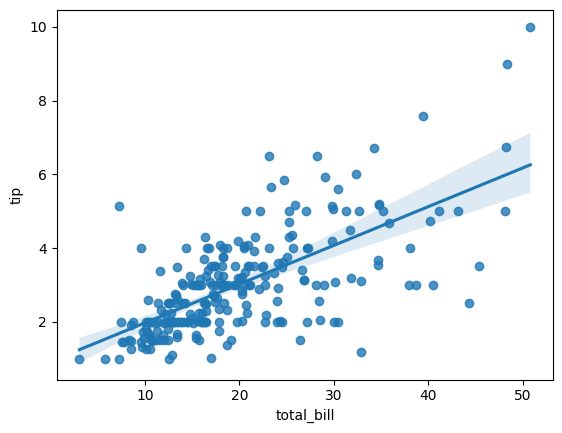

In [51]:
# axes level
# hue parameter is not available 
sns.regplot(data=tips,x='total_bill',y='tip')

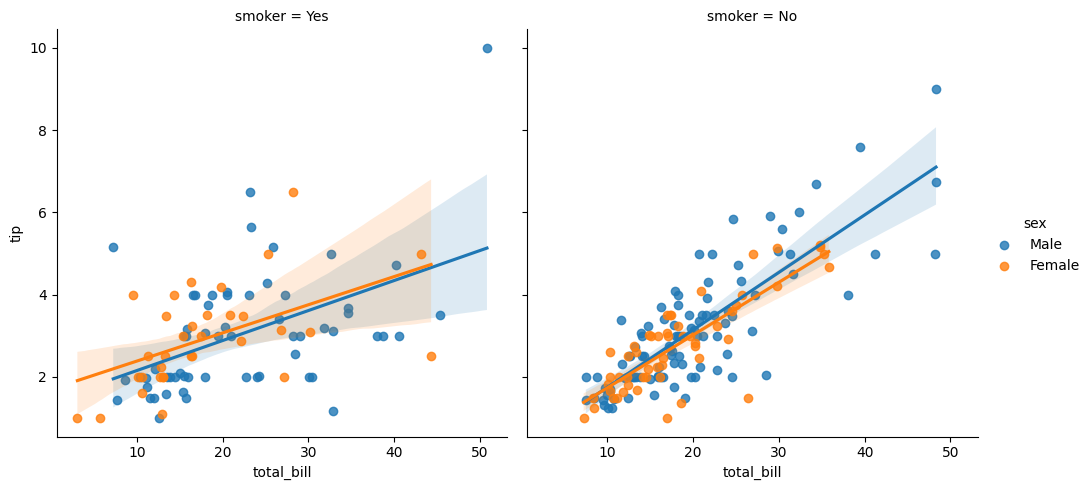

In [54]:
sns.lmplot(data=tips,x='total_bill',y='tip',hue='sex',col='smoker')

<Axes: xlabel='total_bill', ylabel='tip'>

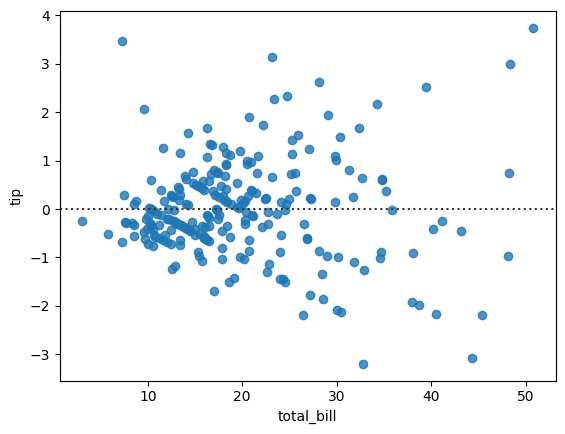

In [55]:
# residplot
sns.residplot(data=tips,x='total_bill',y='tip')

### A second way to plot Facet plots -> FacetGrid

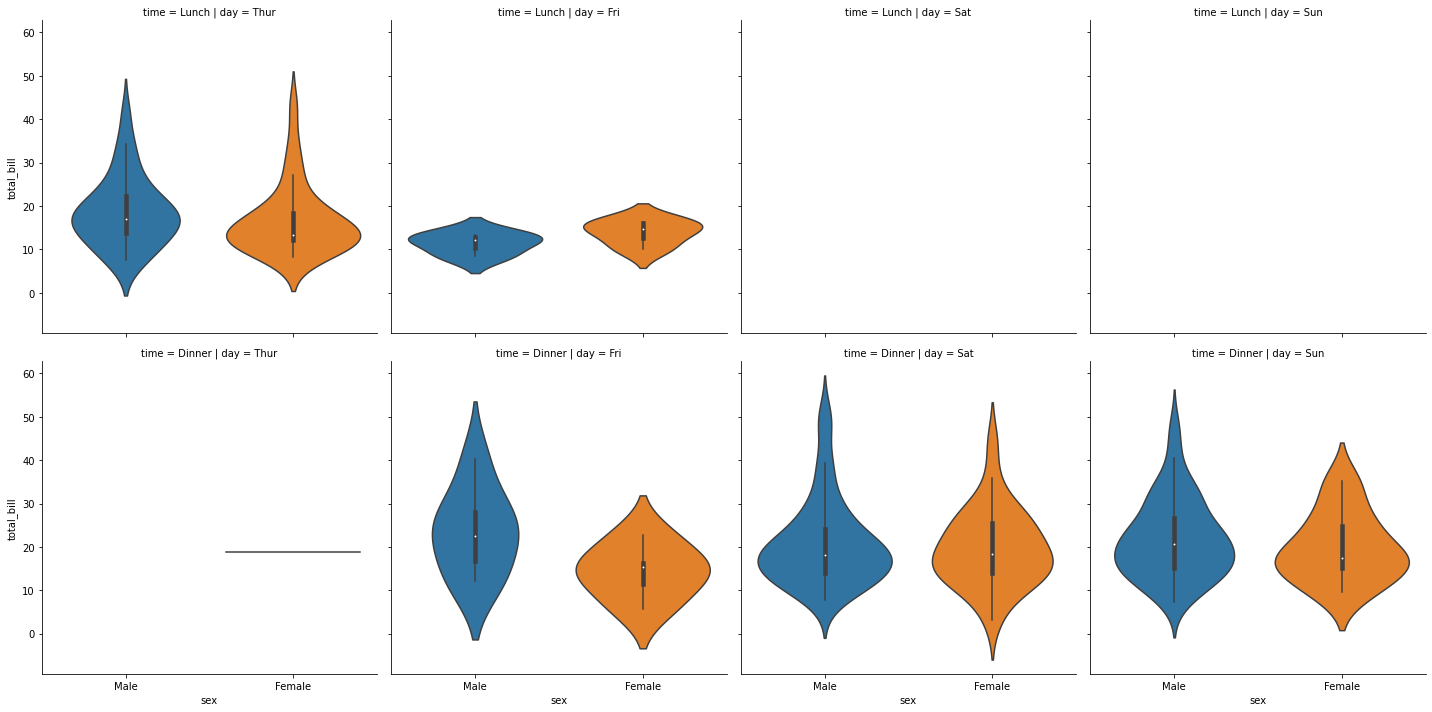

In [ ]:
# figure level -> relplot -> displot -> catplot -> lmplot
sns.catplot(data=tips,x='sex',y='total_bill',kind='violin',col='day',row='time')

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


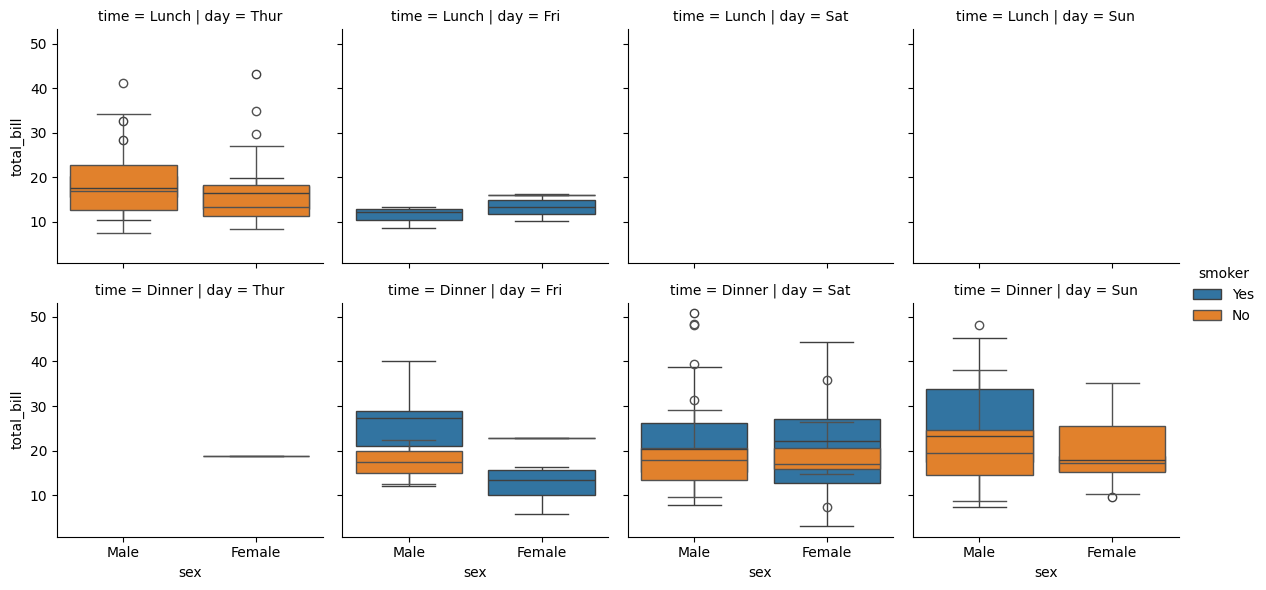

In [60]:
g = sns.FacetGrid(data=tips,col='day',row='time',hue='smoker')
g.map(sns.boxplot,'sex','total_bill')
g.add_legend()

In [ ]:
# height and aspect

### Plotting Pairwise Relationship (PairGrid Vs Pairplot)

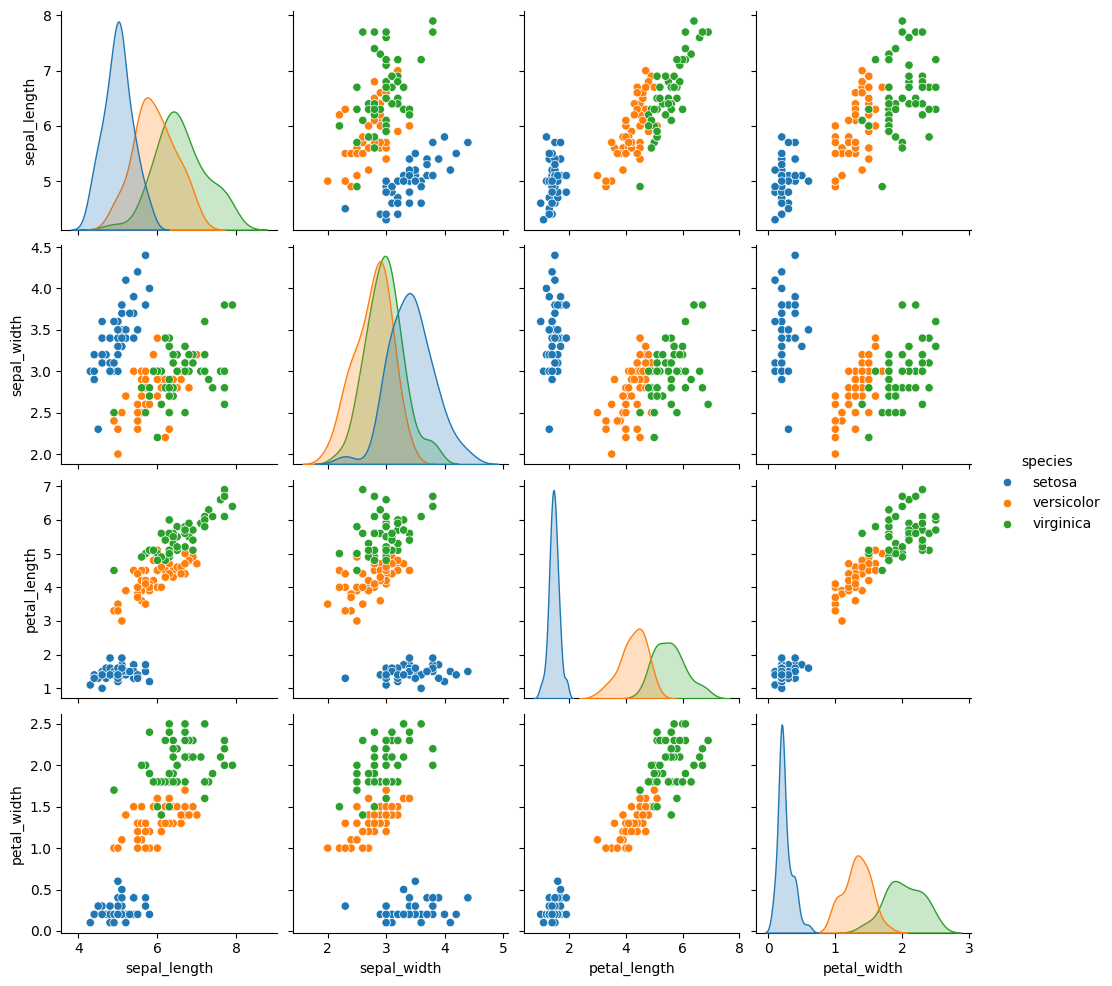

In [61]:
_ = sns.pairplot(iris,hue='species')

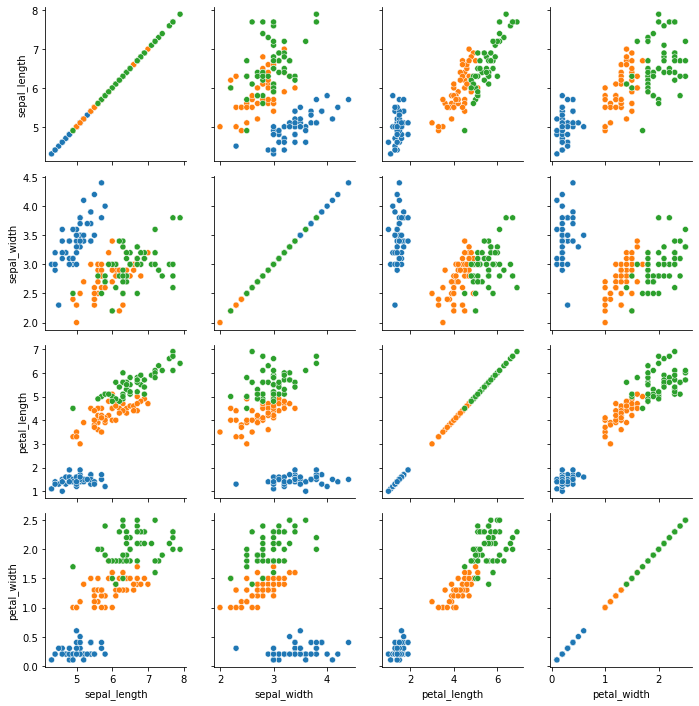

In [ ]:
# pair grid
g = sns.PairGrid(data=iris,hue='species')
# g.map
g.map(sns.scatterplot)

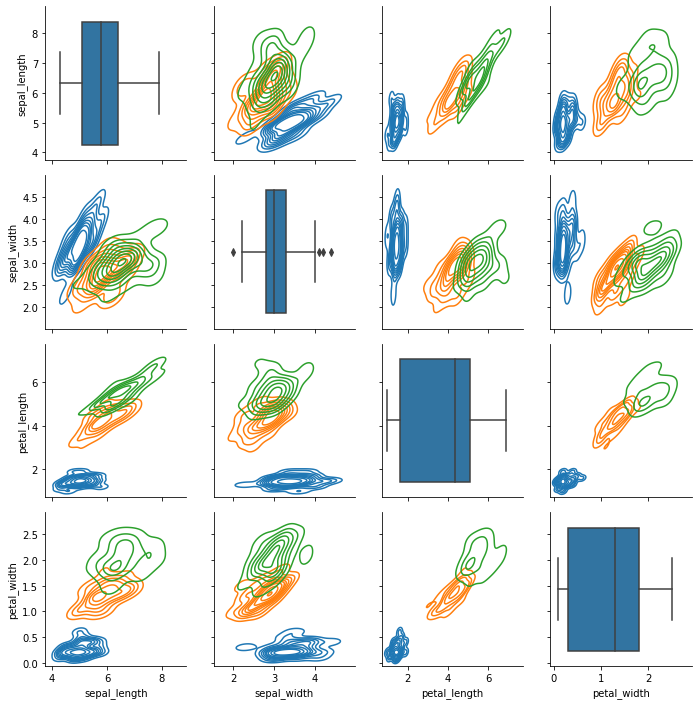

In [ ]:
# map_diag -> map_offdiag
g = sns.PairGrid(data=iris,hue='species')
g.map_diag(sns.boxplot)
g.map_offdiag(sns.kdeplot)

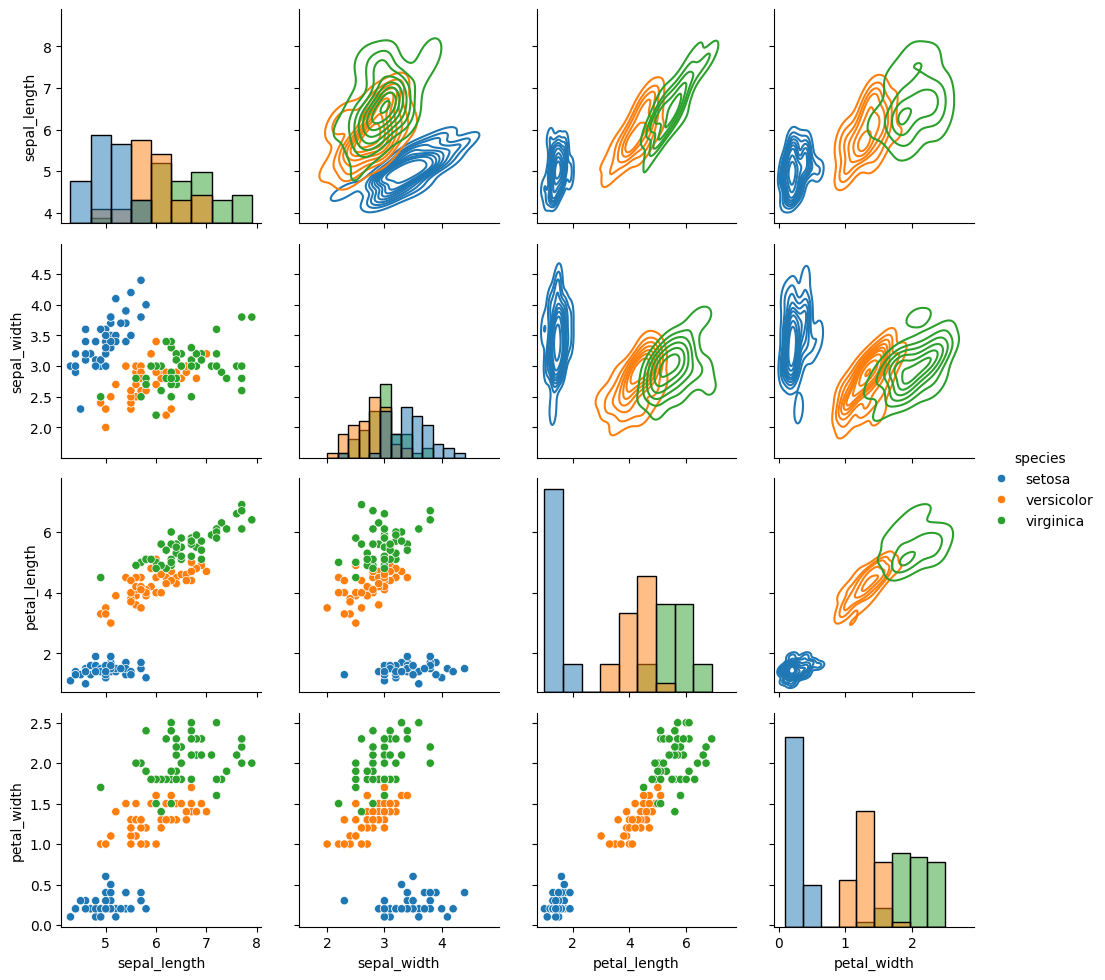

In [65]:
# map_diag -> map_upper -> map_lower
g = sns.PairGrid(data=iris,hue='species')
g.map_diag(sns.histplot)
g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot)
g.add_legend()

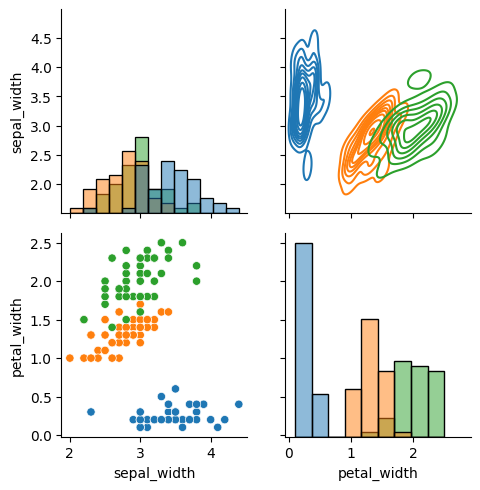

In [66]:
# vars
g = sns.PairGrid(data=iris,hue='species',vars=['sepal_width','petal_width'])
g.map_diag(sns.histplot)
g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot)

### JointGrid Vs Jointplot

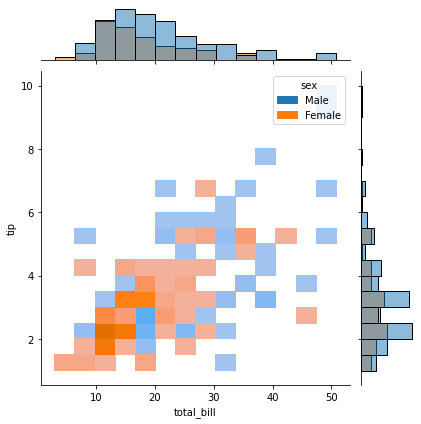

In [ ]:
sns.jointplot(data=tips,x='total_bill',y='tip',kind='hist',hue='sex')

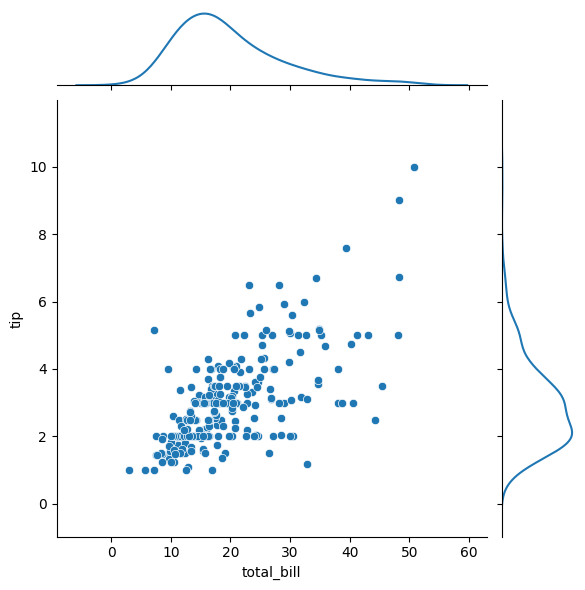

In [72]:
g = sns.JointGrid(data=tips,x='total_bill',y='tip')
g.plot(sns.scatterplot,sns.kdeplot)

### Utility Functions

In [ ]:
# get dataset names
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
# load dataset
sns.load_dataset('planets')

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008
